In [1]:
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

In [2]:
# Wizualizacja sieci linii kolejowych łączących największe miasta w Polsce.
# Wybrano 30 polskich miast powyżej 100 tysięcy mieszkańców i zwizualizowano linie kolejowe łączące je ze sobą.
# Wagi krawędzi odpowiadają temu, czy połączenie między miastami jest dwutorowe na całej długości, czy też nie.
# Wagi wierzchołków odpowiadają liczbie mieszkańców miast (podzielonej przez 100 000 i zaokrąglonej).
# Dane nt. siatki wzięte ze strony internetowej PKP PLK SA.

edgelist_df = pd.DataFrame({
    "source": ["Warsz.", "Łódź", "Warsz.", "Częst.", "Sosn.", "Sosn.", "Kato.", "Częst.", "Warsz.", "Kielce", "Kraków", "Rzesz.", "Rzesz.", "Warsz.",
              "Warsz.", "Łódź", "Warsz.", "Gdańsk", "Gdynia", "Kosz.", "Szcz.", "Szcz.", "Poznań", "Gorzów", "Z.G.", "Poznań", "Kielce", "Poznań",
              "Bydg.", "Bydg.", "Bydg.", "Toruń", "Toruń", "Zabrze", "Gliw.", "Kato.", "Tarnów", "Gdańsk", "Warsz.", "Elbląg", "Olszt.", "Warsz.",
              "Biał.", "Kosz.", "Kosz.", "Opole", "Radom", "Łódź", "Warsz.", "Wałb.", "Wałb.", "Wałb.", "Toruń", "Częst.", "Wroc.", "Kraków", 
               "Toruń", "Szcz.", "Szcz.", "Szcz.", "Łódź", "Kato.", "Łódź"],
    "target": ["Łódź", "Częst.", "Sosn.", "Sosn.", "Kraków", "Kato.", "Zabrze", "Opole", "Radom", "Kraków", "Tarnów", "Kielce", "Lublin", "Lublin",
              "Poznań", "Poznań", "Gdańsk", "Gdynia", "Kosz.", "Szcz.", "Poznań", "Gorzów", "Gorzów", "Z.G.", "Wroc.", "Z.G.", "Radom", "Wroc.",
              "Gdańsk", "Poznań", "Toruń", "Warsz.", "Łódź", "Gliw.", "Opole", "B.B.", "Rzesz.", "Elbląg", "Olszt.", "Olszt.", "Biał.", "Biał.",
              "Lublin", "Poznań", "Bydg.", "Wroc.", "Lublin", "Płock", "Płock", "Wroc.", "Z.G.", "Opole", "Olszt.", "Kielce", "Łódź",  "B.B.", 
              "Elbląg", "Z.G.", "Gdańsk", "Bydg.", "Gliw.", "Gliw.", "Radom"],
    "weight": [2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2,
              2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2,
              2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2,
              1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 
               1, 2, 1, 1, 2, 2, 1]
    
})
edgelist_df

,source,target,weight
0,Warsz.,Łódź,2
1,Łódź,Częst.,2
2,Warsz.,Sosn.,2
3,Częst.,Sosn.,2
4,Sosn.,Kraków,2
...,...,...,...
58,Szcz.,Gdańsk,1
59,Szcz.,Bydg.,1
60,Łódź,Gliw.,2
61,Kato.,Gliw.,2


In [3]:
nodes_values = dict(zip(["Warsz.", "Kraków", "Wroc.", "Łódź", "Poznań", "Gdańsk", "Szcz.", "Lublin", "Bydg.", "Biał.", 
                         "Kato.", "Gdynia", "Częst.", "Radom", "Rzesz.", "Toruń", "Sosn.", "Kielce", "Gliw.", "Olszt.",
                         "B.B.", "Zabrze", "Z.G.", "Opole", "Gorzów", "Elbląg", "Płock", "Wałb.", "Tarnów", "Kosz."], 
                        [17, 8, 7, 7, 5, 5, 4, 3, 3, 3, 
                         3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                         2, 2, 1, 1, 1, 1, 1, 1, 1, 1]))


In [4]:
# Kodowanie przybliżonego położenia geograficznego miast

pos = dict(zip(["Warsz.", "Kraków", "Wroc.", "Łódź", "Poznań", "Gdańsk", "Szcz.", "Lublin", "Bydg.", "Biał.", 
                "Kato.", "Gdynia", "Częst.", "Radom", "Rzesz.", "Toruń", "Sosn.", "Kielce", "Gliw.", "Olszt.",
                "B.B.", "Zabrze", "Z.G.", "Opole", "Gorzów", "Elbląg", "Płock", "Wałb.", "Tarnów", "Kosz."], 
               [(21, 52), (20, 50.1), (17, 51), (19.5, 51.7), (17, 52.4), (18.5, 54.3), (14.5, 53.5), (22.5, 51.25), (18, 53), (23, 53), 
                (19, 50.1), (18.5, 54.5), (19.1, 50.8), (21, 51.4), (22, 50.1), (18.5, 53), (19.2, 50.4), (20.6, 50.8), (18.5, 50.1), (20.5, 53.8),
                (19, 49.8), (18.8, 50.3), (15.4, 52), (18, 50.7), (15.2, 52.8), (19.4, 54.1), (19.7, 52.6), (16.2, 50.8), (21, 50), (16.1, 54.1)]))

In [5]:
graph = nx.from_pandas_edgelist(edgelist_df, edge_attr=True)  # twoRzesz.nie grafu z listy krawędzi (są też inne metody)
nx.set_node_attributes(graph, nodes_values, "value")  # aktualizacja atrybutów wierzchołków

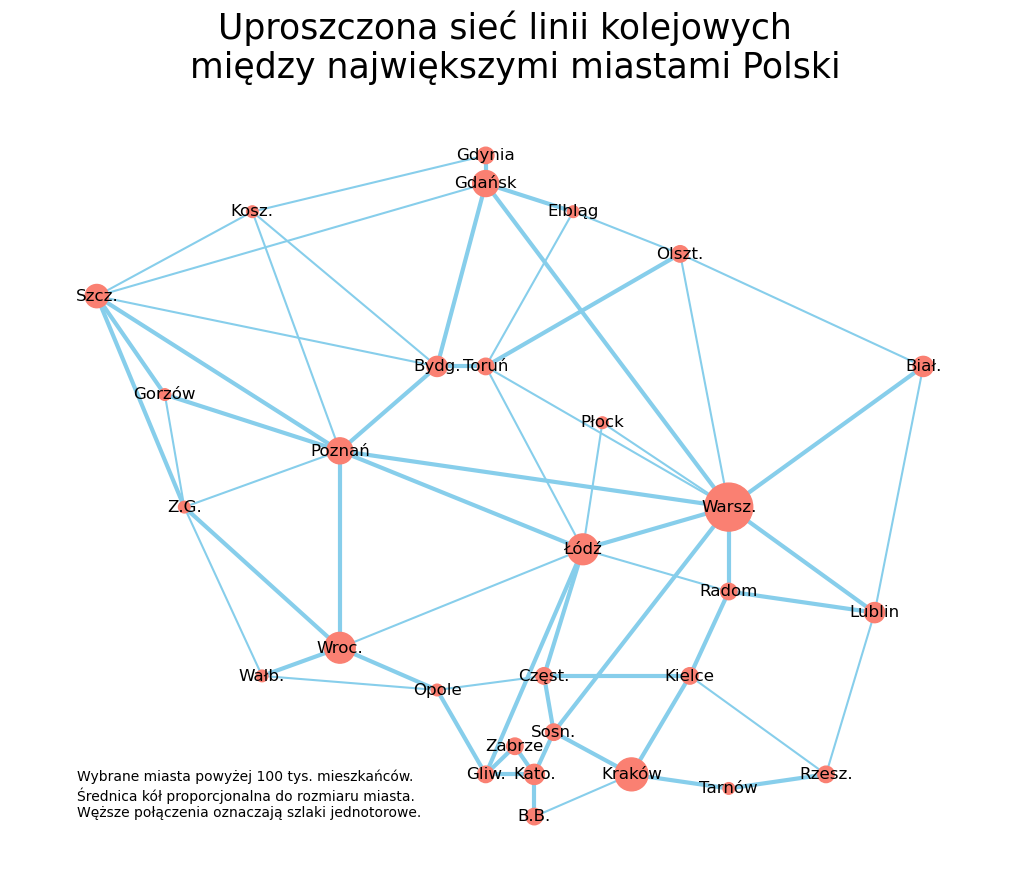

In [6]:
fig = plt.figure(figsize=(10, 8))

nx.draw(
    graph,
    pos = pos,
    with_labels=True,
    node_color="salmon",
    edge_color="skyblue",
    node_size=[v[1]["value"] * 70 for v in graph.nodes(data=True)],
    width=[e[2]["weight"] * 1.5 for e in graph.edges(data=True)],
)
plt.title("Uproszczona sieć linii kolejowych \n między największymi miastami Polski", size = 25)
plt.text(14.3, 49.8, "Wybrane miasta powyżej 100 tys. mieszkańców. \nŚrednica kół proporcjonalna do rozmiaru miasta. \nWęższe połączenia oznaczają szlaki jednotorowe.")

fig.savefig('KrolMateusz_graf.png', bbox_inches='tight')